In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as welch
from scipy.signal import find_peaks


In [32]:
M_points_signal = 1024
"""
Calcula el vector de tiempo para una señal dada.
Parámetros:
- M_points_signal (int): La cantidad de puntos en la señal.
- Time (float): La duración total de la señal.
Retornos:
- vector_time (numpy.ndarray): El vector de tiempo para la señal.
"""
N_number_signals = 1000
Time = 3
fs = M_points_signal/Time

vector_time = np.linspace(0, Time, M_points_signal)

In [33]:
def generate_signal():
    """
    Genera una señal compuesta por tres componentes sinusoidales.
    Returns:
    signal (array): La señal generada.
    """
    freq1 = 1
    freq2 = 3
    freq3 = 5
    
    omega_0 = 2*np.pi
    
    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5
    
    #signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.sin(omega_0*freq2*vector_time) + amplitude3*np.cos((omega_0+np.pi/2)*freq3*vector_time))
    return signal

In [34]:
def noise_gaussian(mean, level_noise,size):
    """
    Genera ruido gaussiano con la media, el nivel de ruido y el tamaño especificados.

    Parameters:
    - media (float): el valor medio de la distribución gaussiana.
    - nivel_ruido (float): la desviación estándar o el nivel de ruido de la distribución gaussiana.
    - tamaño (int): el tamaño de la matriz de ruido que se generará.

    Returns:
    - ruido (ndarray): una matriz de ruido gaussiano con el tamaño especificado

    """
    noise= np.random.normal(mean, level_noise, size=M_points_signal)
    return noise

In [35]:
from scipy.signal import welch

def psd_calculate(signal, fs, nperseg):
    """
    Calcula la densidad espectral de potencia (PSD) de una señal dada.

    Parámeters:
    - signal: array_like
    La señal de entrada.
    - fs: float
    La frecuencia de muestreo de la señal.
    - nperseg: int
    La longitud de cada segmento utilizado para el cálculo de PSD.

    reuturns:
    - freq: array_like
    Las frecuencias correspondientes a los valores de PSD.
    - Pxx_den: array_like
    Los valores de densidad espectral de potencia.

    """
    freq, Pxx_den = welch(signal, fs=fs, nperseg=nperseg)
    return freq, Pxx_den

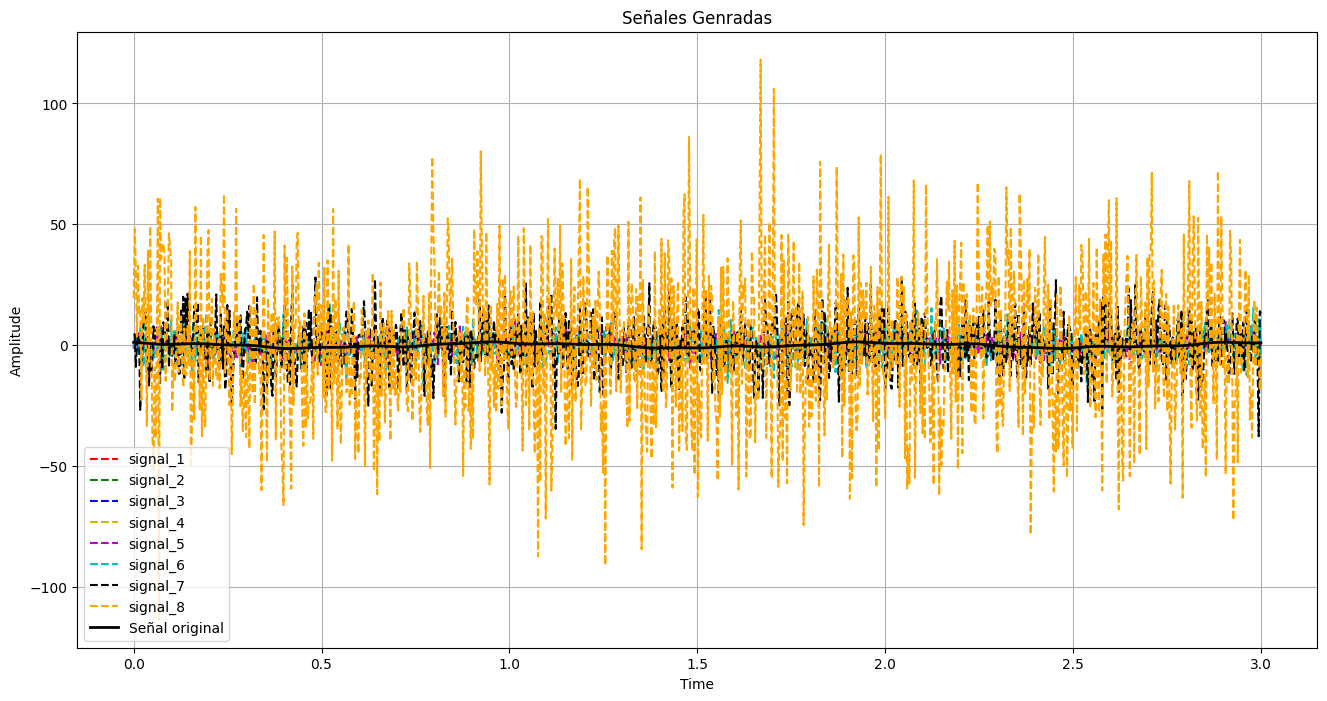

In [36]:
signal = generate_signal() 
"""
Gráfica múltiples señales con diferentes niveles de ruido gaussiano agregado.

Parameters:
- signal: La señal original.
- signal_1: La señal con ruido gaussiano agregado con una desviación estándar(sigma) de 0,1.
- signal_2: La señal con ruido gaussiano agregado con una desviación estándar(sigma) de 0,3.
- signal_4: La señal con ruido gaussiano agregado con una desviación estándar(sigma) de 1.
- signal_3: La señal con ruido gaussiano agregado con una desviación estándar(sigma de 0,5.
- signal_5: La señal con ruido gaussiano agregado con una desviación estándar(sigma) de 3.
- signal_6: La señal con ruido gaussiano agregado con una desviación estándar de 5.
- signal_7: La señal con ruido gaussiano agregado con una desviación estándar de 10.
- signal_8: La señal con ruido gaussiano agregado con una desviación estándar de 30.

Returns:
la gráfica de las señales generadas.
"""
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 0.5, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_5 = generate_signal() + noise_gaussian(0, 3, M_points_signal)
signal_6 = generate_signal() + noise_gaussian(0, 5, M_points_signal)
signal_7 = generate_signal() + noise_gaussian(0, 10, M_points_signal)
signal_8 = generate_signal() + noise_gaussian(0, 30, M_points_signal)


plt.figure(figsize=(16,8))
plt.plot(vector_time, signal_1, label='signal_1', color='r', linestyle='--')
plt.plot(vector_time, signal_2, label='signal_2', color='g', linestyle='--')
plt.plot(vector_time, signal_3, label='signal_3', color='b', linestyle='--')
plt.plot(vector_time, signal_4, label='signal_4', color='y', linestyle='--') 
plt.plot(vector_time, signal_5, label='signal_5', color='m', linestyle='--')
plt.plot(vector_time, signal_6, label='signal_6', color='c', linestyle='--')
plt.plot(vector_time, signal_7, label='signal_7', color='k', linestyle='--')
plt.plot(vector_time, signal_8, label='signal_8', color='orange', linestyle='--')
plt.plot(vector_time, signal, label='Señal original', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1400\1954035056.py:58: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


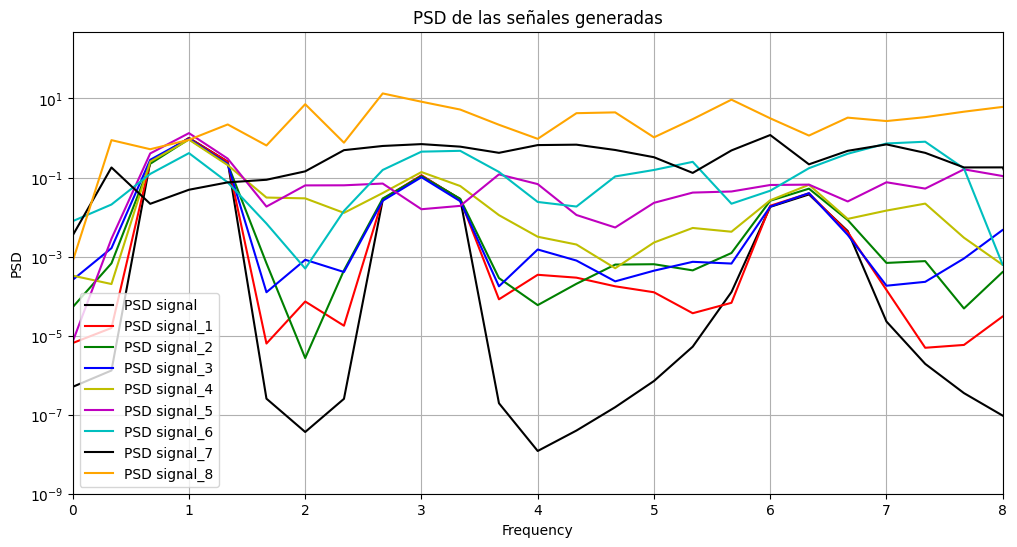

In [37]:
#psd de las señales creadas  por welch
"""
Calcula y traza la densidad espectral de potencia (PSD) de múltiples señales.

Parameters:
- signal: La señal de entrada.
- signal_1: La primera señal adicional.
- signal_2: La segunda señal adicional.
- signal_3: La tercera señal adicional.
- signal_4: La cuarta señal adicional.
- signal_5: La quinta señal adicional.
- signal_6: La sexta señal adicional.
- signal_7: La séptima señal adicional.
- signal_8: La octava señal adicional.
- fs: La frecuencia de muestreo de las señales.
- M_points_signal: La cantidad de puntos que se utilizarán para el cálculo de PSD.

Returns:


Esta función calcula la PSD de múltiples señales utilizando el método Welch y traza los resultados en una escala logarítmica.
La PSD de cada señal se calcula utilizando la función `psd_calculate`, que toma la señal, la frecuencia de muestreo y la cantidad de puntos como entrada.
Los valores de PSD y las frecuencias correspondientes se almacenan en archivos separados. matrices para cada señal.
Luego, los valores PSD se grafican utilizando la función `semilogy` del módulo `matplotlib.pyplot`.
El gráfico incluye una leyenda con etiquetas para cada señal, así como etiquetas de eje y un título.
El eje x representa la frecuencia, mientras que el eje y representa los valores PSD.
El gráfico se muestra utilizando la función `show` del módulo `matplotlib.pyplot`.
"""
freq, Pxx_signal = psd_calculate(signal, fs, M_points_signal)
freq1, Pxx_signal_1 = psd_calculate(signal_1, fs, M_points_signal)
freq2, Pxx_signal_2 = psd_calculate(signal_2, fs, M_points_signal)
freq3, Pxx_signal_3 = psd_calculate(signal_3, fs, M_points_signal)
freq4, Pxx_signal_4 = psd_calculate(signal_4, fs, M_points_signal)
freq5, Pxx_signal_5 = psd_calculate(signal_5, fs, M_points_signal)
freq6, Pxx_signal_6 = psd_calculate(signal_6, fs, M_points_signal)
freq7, Pxx_signal_7 = psd_calculate(signal_7, fs, M_points_signal)
freq8, Pxx_signal_8 = psd_calculate(signal_8, fs, M_points_signal)



plt.figure(figsize=(12,6))
plt.semilogy(freq, Pxx_signal, label='PSD signal', color='black')
plt.semilogy(freq1, Pxx_signal_1, label='PSD signal_1', color='r')
plt.semilogy(freq2, Pxx_signal_2, label='PSD signal_2', color='g')
plt.semilogy(freq3, Pxx_signal_3, label='PSD signal_3', color='b')
plt.semilogy(freq4, Pxx_signal_4, label='PSD signal_4', color='y')
plt.semilogy(freq5, Pxx_signal_5, label='PSD signal_5', color='m')
plt.semilogy(freq6, Pxx_signal_6, label='PSD signal_6', color='c')
plt.semilogy(freq7, Pxx_signal_7, label='PSD signal_7', color='k')
plt.semilogy(freq8, Pxx_signal_8, label='PSD signal_8', color='orange')

plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD de las señales generadas')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [39]:
from sklearn.model_selection import train_test_split
"""
Divide las señales dadas y las matrices psds en conjuntos de entrenamiento y prueba utilizando la función train_test_split de sklearn.model_selection.
Parameters:
- signals (ndarray): Matriz de señales.
- psds (ndarray): Matriz de densidades espectrales de potencia.
Returns:
- X_train (ndarray): Conjunto de entrenamiento de señales.
- X_test (ndarray): Conjunto de prueba de señales.
- y_train (ndarray): Conjunto de entrenamiento de densidades espectrales de potencia.
- y_test (ndarray): Conjunto de prueba de densidades espectrales de potencia.
"""
import numpy as np

# Preparación de los datos
signals = np.array([signal_1, signal_2, signal_3, signal_4, signal_5, signal_6, signal_7, signal_8])
psds = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4, Pxx_signal_5, Pxx_signal_6, Pxx_signal_7, Pxx_signal_8])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(signals, psds, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5, 1024)
(5, 513)
(3, 1024)
(3, 513)


In [40]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
import numpy as np
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

def build_model(M_points_signal, Pxx_signal):
    """
    Construye un modelo de red neuronal para el procesamiento de señales.
    Parameters:
    - M_points_signal (int): Número de puntos en la señal de entrada.
    - Pxx_signal (list): Densidad espectral de potencia (PSD) de la señal.
    Returns:
    - model (secuencial): Modelo de red neuronal compilado.
    """
    
    # Construcción del modelo
    model = Sequential()

    # Añadir capas al modelo
    model.add(Dense(512, input_shape=(M_points_signal,), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(len(Pxx_signal), activation='linear'))  # Salida con la misma cantidad de puntos que la PSD

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='mean_squared_error', 
                  metrics=[MeanAbsoluteError(), MeanSquaredError()])
    
    return model

# Construcción y entrenamiento del modelo
model = build_model(M_points_signal, Pxx_signal)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, batch_size=64)


Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 117.2692 - mean_absolute_error: 5.5815 - mean_squared_error: 116.0763 - val_loss: 2.1321 - val_mean_absolute_error: 0.5813 - val_mean_squared_error: 0.9471
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 102.5604 - mean_absolute_error: 5.0518 - mean_squared_error: 101.3754 - val_loss: 1.9433 - val_mean_absolute_error: 0.5106 - val_mean_squared_error: 0.7633
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 73.0599 - mean_absolute_error: 4.3728 - mean_squared_error: 71.8799 - val_loss: 1.8021 - val_mean_absolute_error: 0.4536 - val_mean_squared_error: 0.6261
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 65.6118 - mean_absolute_error: 4.0391 - mean_squared_error: 64.4358 - val_loss: 1.6967 - val_mean_absolute_error: 0.4084 - val_mean_squared_error: 0.5240
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 38.8234 - mean_absolute_error: 3.1630 - mean_squared_error: 37.6507 - val_loss: 1.6

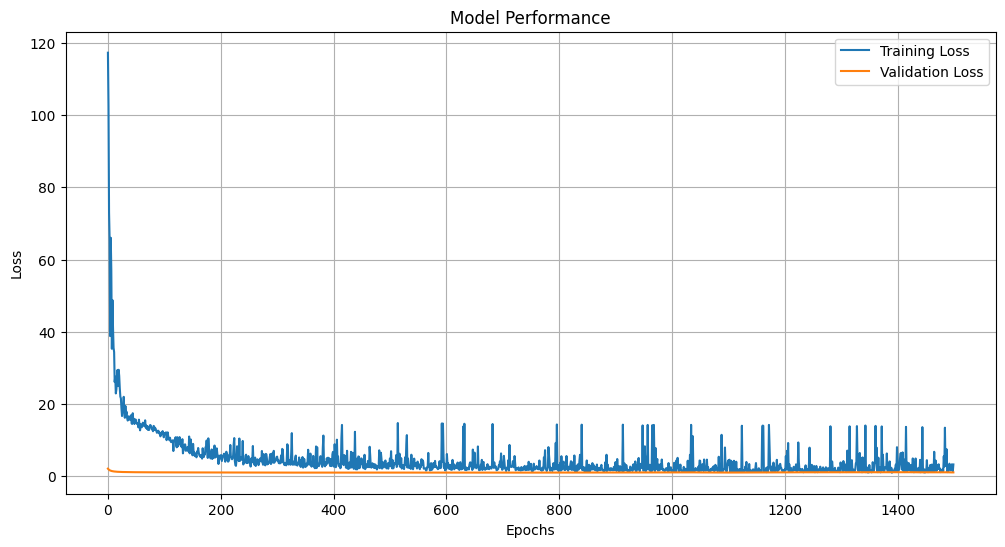

In [41]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
MAE (L1): 0.3365493756913128
MSE (L2): 0.3259611624238191
RMSE: 0.5709300854078537


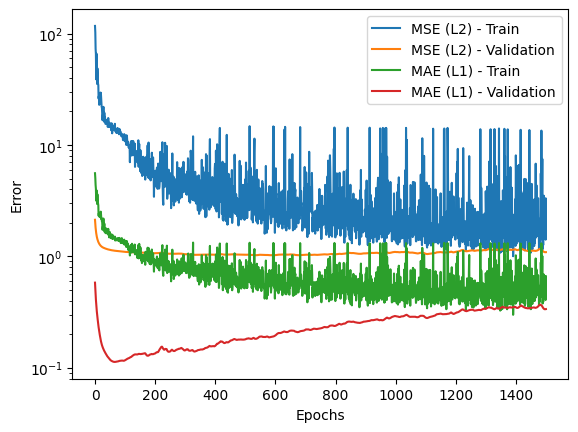

In [42]:
# Obtener predicciones
"""
Obtiene predicciones utilizando un modelo entrenado y calcula varias métricas para evaluar el rendimiento del modelo.
Parameters:
- X_test (similar a una matriz): los datos de entrada para probar el modelo.
- y_test (similar a una matriz): los datos de destino para probar el modelo.
- model (object): el objeto del modelo entrenado.
Returns:
- mae (float): el error absoluto medio (L1) entre los valores predichos y los reales.
- mse (float): el error cuadrático medio (L2) entre los valores predichos y los reales.
- rmse (float): el error cuadrático medio raíz entre los valores predichos y los reales.
Gráfica los errores durante el proceso de entrenamiento en una escala logarítmica.
"""
y_pred = model.predict(X_test)

# Calcular métricas
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MAE (L1): {mae}")
print(f"MSE (L2): {mse}")
print(f"RMSE: {rmse}")


plt.semilogy(history.history['loss'], label='MSE (L2) - Train')
plt.semilogy(history.history['val_loss'], label='MSE (L2) - Validation')
plt.semilogy(history.history['mean_absolute_error'], label='MAE (L1) - Train')
plt.semilogy(history.history['val_mean_absolute_error'], label='MAE (L1) - Validation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 125.7523 - mean_absolute_error: 5.8716 - mean_squared_error: 124.5582 - val_loss: 1.8061 - val_mean_absolute_error: 0.4698 - val_mean_squared_error: 0.6197
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 82.1495 - mean_absolute_error: 4.6721 - mean_squared_error: 80.9631 - val_loss: 1.6999 - val_mean_absolute_error: 0.4242 - val_mean_squared_error: 0.5183
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 50.2609 - mean_absolute_error: 3.8024 - mean_squared_error: 49.0792 - val_loss: 1.6208 - val_mean_absolute_error: 0.3861 - val_mean_squared_error: 0.4429
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 48.4913 - mean_absolute_error: 3.4674 - mean_squared_error: 47.3133 - val_loss: 1.5593 - val_mean_absolute_error: 0.3554 - val_mean_squared_error: 0.3844
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 59.7480 - mean_absolute_error: 3.8516 - mean_squared_error: 58.5731 - val_loss: 1.513

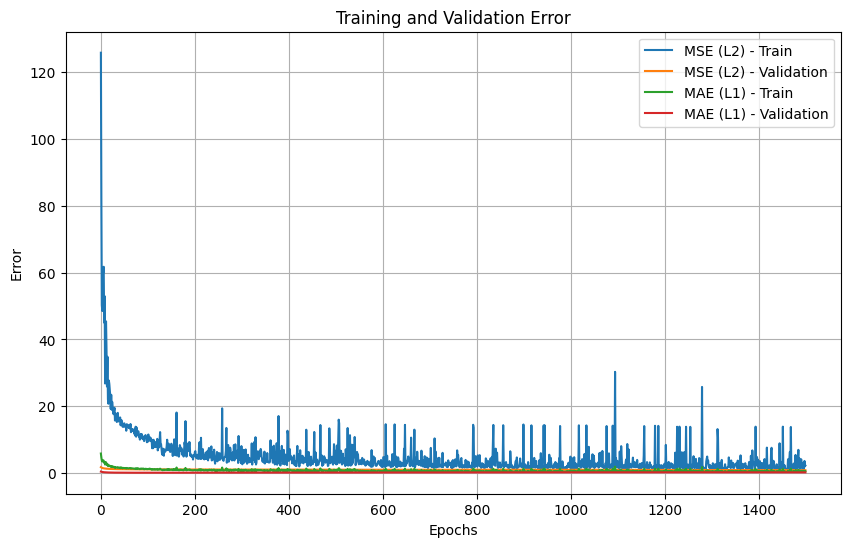

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError

def train_and_evaluate_model(X_train, y_train, X_test, y_test, M_points_signal, Pxx_signal, epochs=1500, batch_size=64):
    """
    Entrena y evalúa un modelo utilizando los datos de prueba y entrenamiento proporcionados.
    Parameters:
    - X_train (numpy.ndarray): Las características de entrada para el entrenamiento.
    - y_train (numpy.ndarray): Los valores objetivo para el entrenamiento.
    - X_test (numpy.ndarray): Las características de entrada para la prueba.
    - y_test (numpy.ndarray): Los valores objetivo para la prueba.
    - M_points_signal (int): La cantidad de puntos en la señal.
    - Pxx_signal (int): La densidad espectral de potencia de la señal.
    - epochs (int): La cantidad de épocas para entrenar el modelo (predeterminado: 100).
    - batch_size (int): El tamaño del lote para entrenar el modelo (predeterminado: 64).
   Returns:
    - mae (float): El error absoluto medio (L1) entre los valores predichos y reales.
    - mse (float): El error cuadrático medio (L2) entre los valores predichos y reales.
    - rmse (flotante): el error cuadrático medio entre los valores previstos y los reales.
    """

    model = build_model(M_points_signal, Pxx_signal)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

    y_pred = model.predict(X_test)
    

    mae = np.mean(np.abs(y_test - y_pred))  
    mse = np.mean((y_test - y_pred) ** 2)  
    rmse = np.sqrt(mse) 
    

    print(f"MAE (L1): {mae}")
    print(f"MSE (L2): {mse}")
    print(f"RMSE: {rmse}")
    

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='MSE (L2) - Train')
    plt.plot(history.history['val_loss'], label='MSE (L2) - Validation')
    plt.plot(history.history['mean_absolute_error'], label='MAE (L1) - Train')
    plt.plot(history.history['val_mean_absolute_error'], label='MAE (L1) - Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Training and Validation Error')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return mae, mse, rmse


mae, mse, rmse = train_and_evaluate_model(X_train, y_train, X_test, y_test, M_points_signal, Pxx_signal)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


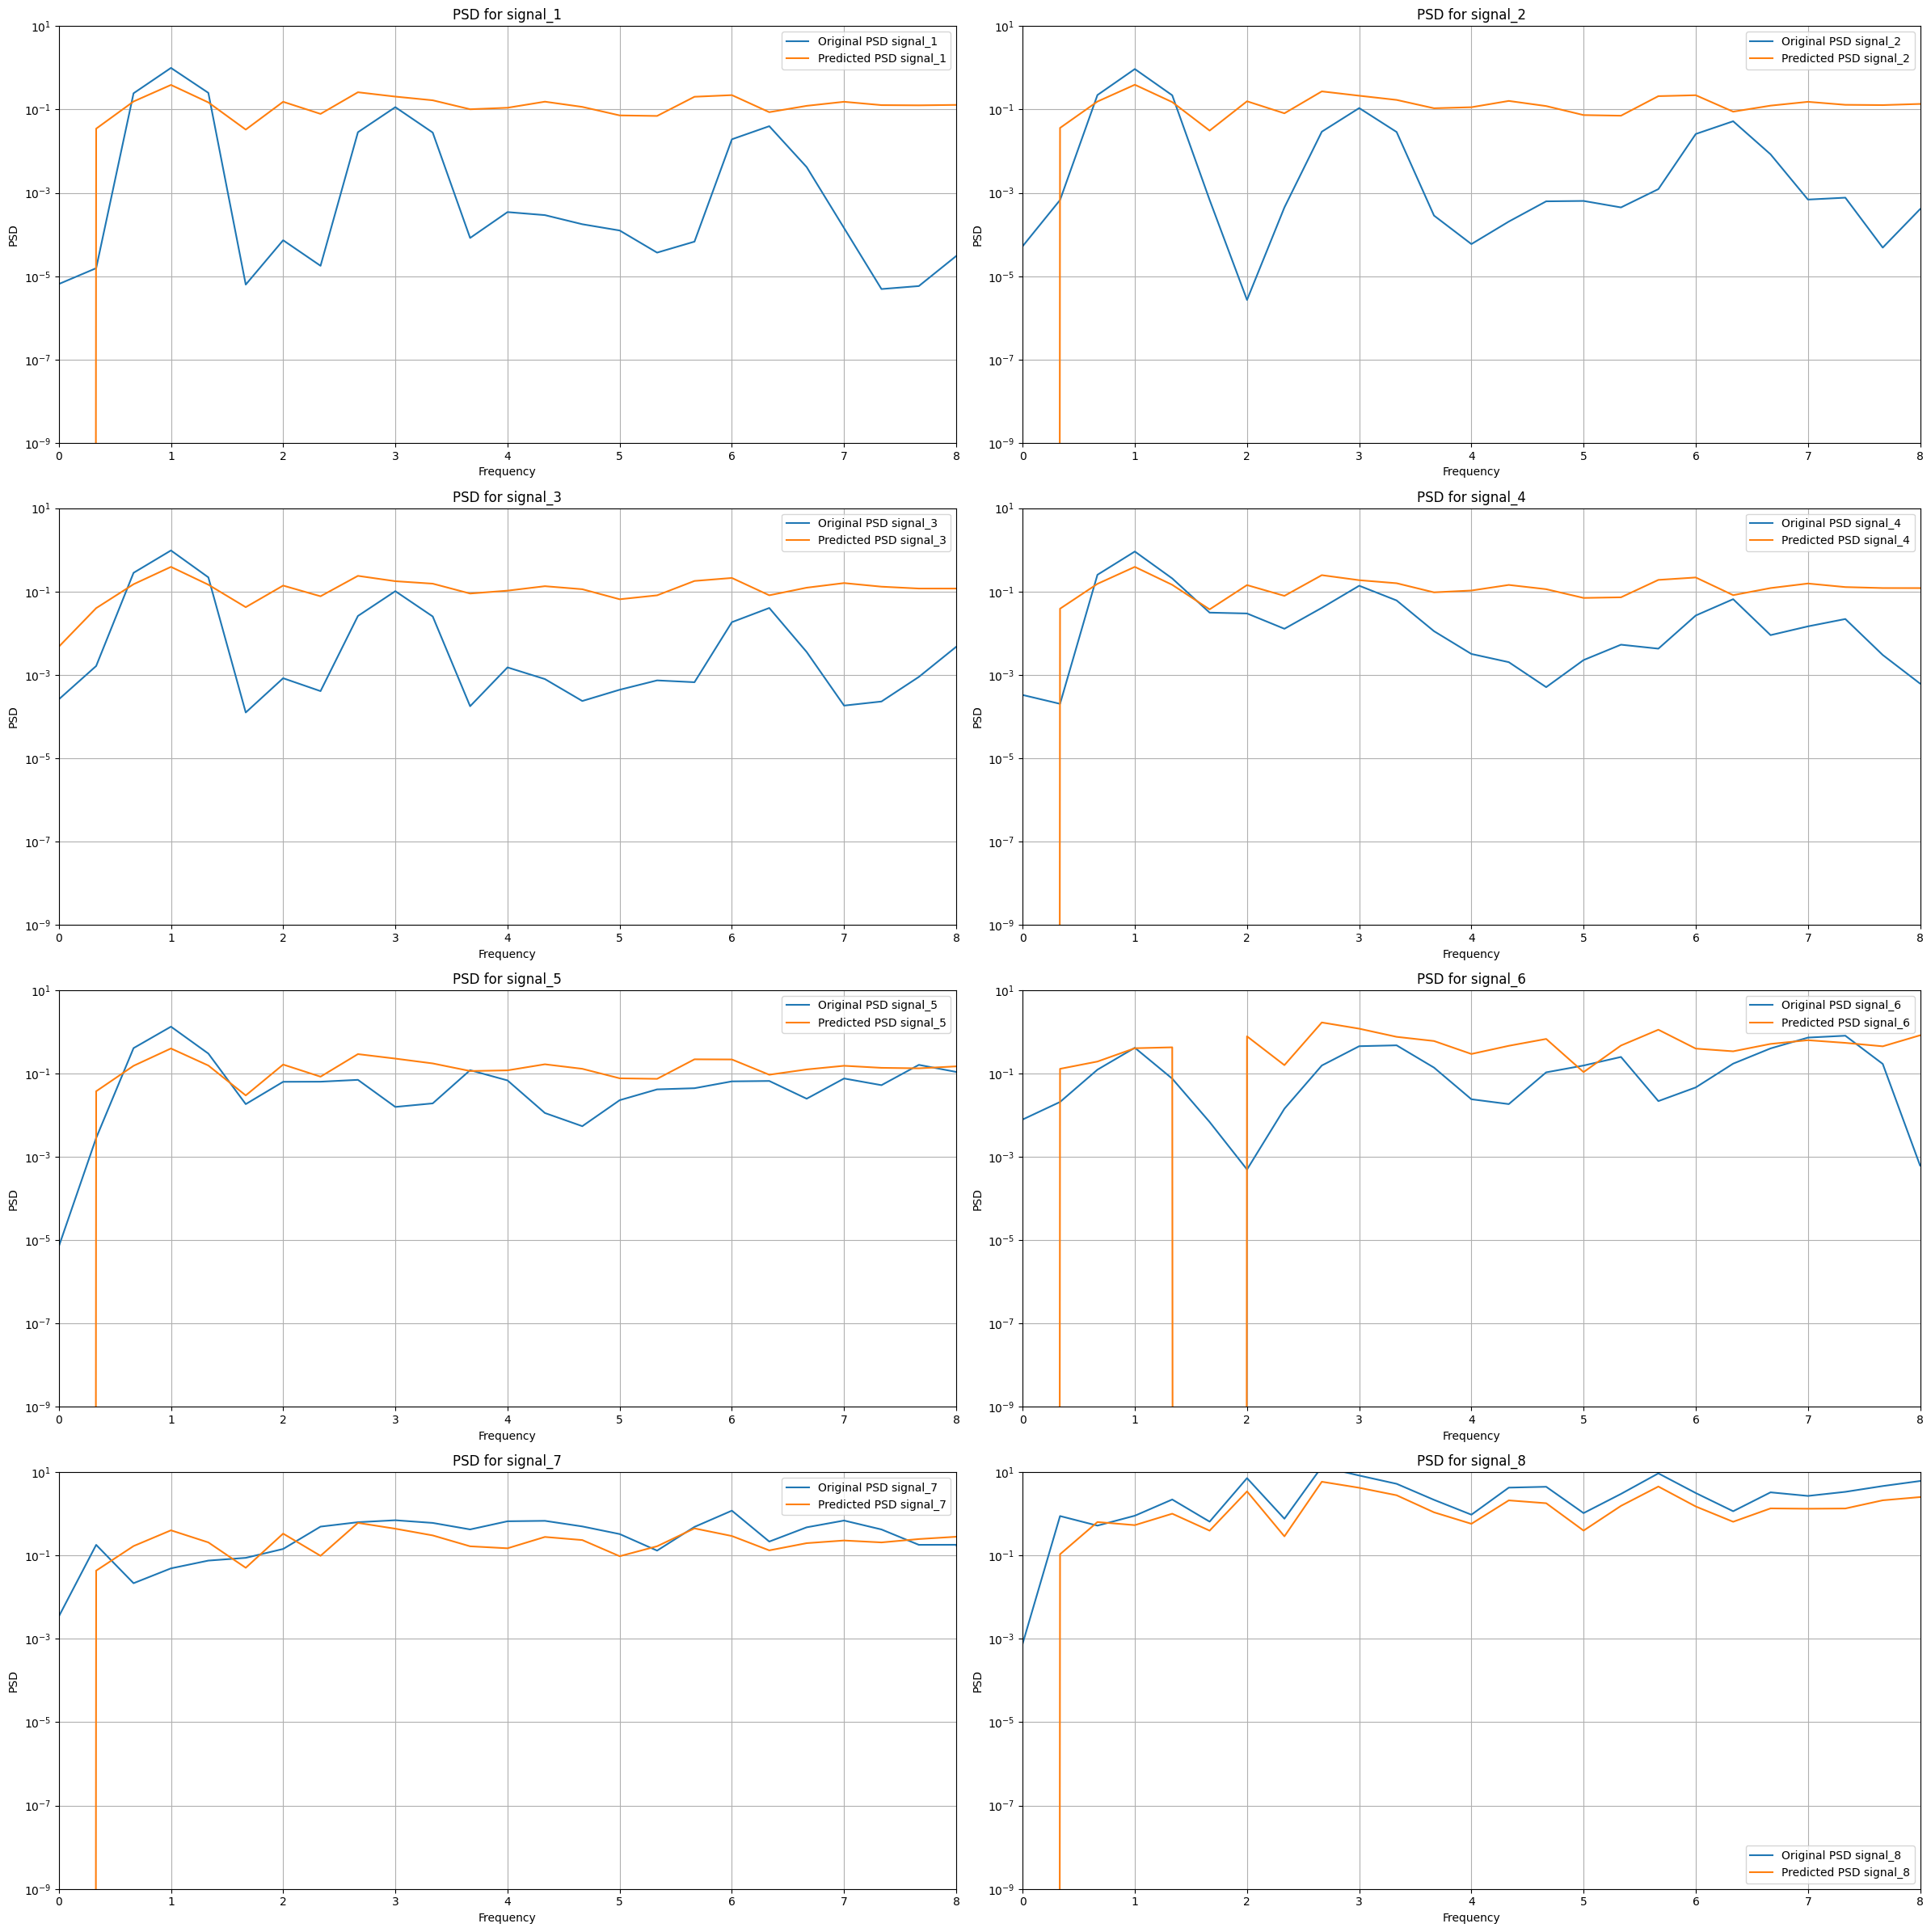

In [44]:
# Call the model to predict the PSDs
predicted_psds = model.predict(signals)

# Create a figure and subplots
fig, axs = plt.subplots(len(signals)//2, 2, figsize=(12*2, 6*(len(signals)//2)))

# Iterate over each signal and its predicted PSD
for i in range(len(signals)):
    # Calculate the position of the subplot based on the row and column
    row = i // 2
    col = i % 2
    
    # Plot the original PSD and the predicted PSD in the same plot
    axs[row, col].semilogy(freq, psds[i], label=f'Original PSD signal_{i+1}')
    axs[row, col].semilogy(freq, predicted_psds[i], label=f'Predicted PSD signal_{i+1}')
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_ylabel('PSD')
    axs[row, col].set_title(f'PSD for signal_{i+1}')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_xlim(0, 8)
    axs[row, col].set_ylim(10**-9, 10)

# Adjust the spacing between subplots
plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE (L1): 0.3365493756913128
MSE (L2): 0.3259611624238191
RMSE: 0.5709300854078537


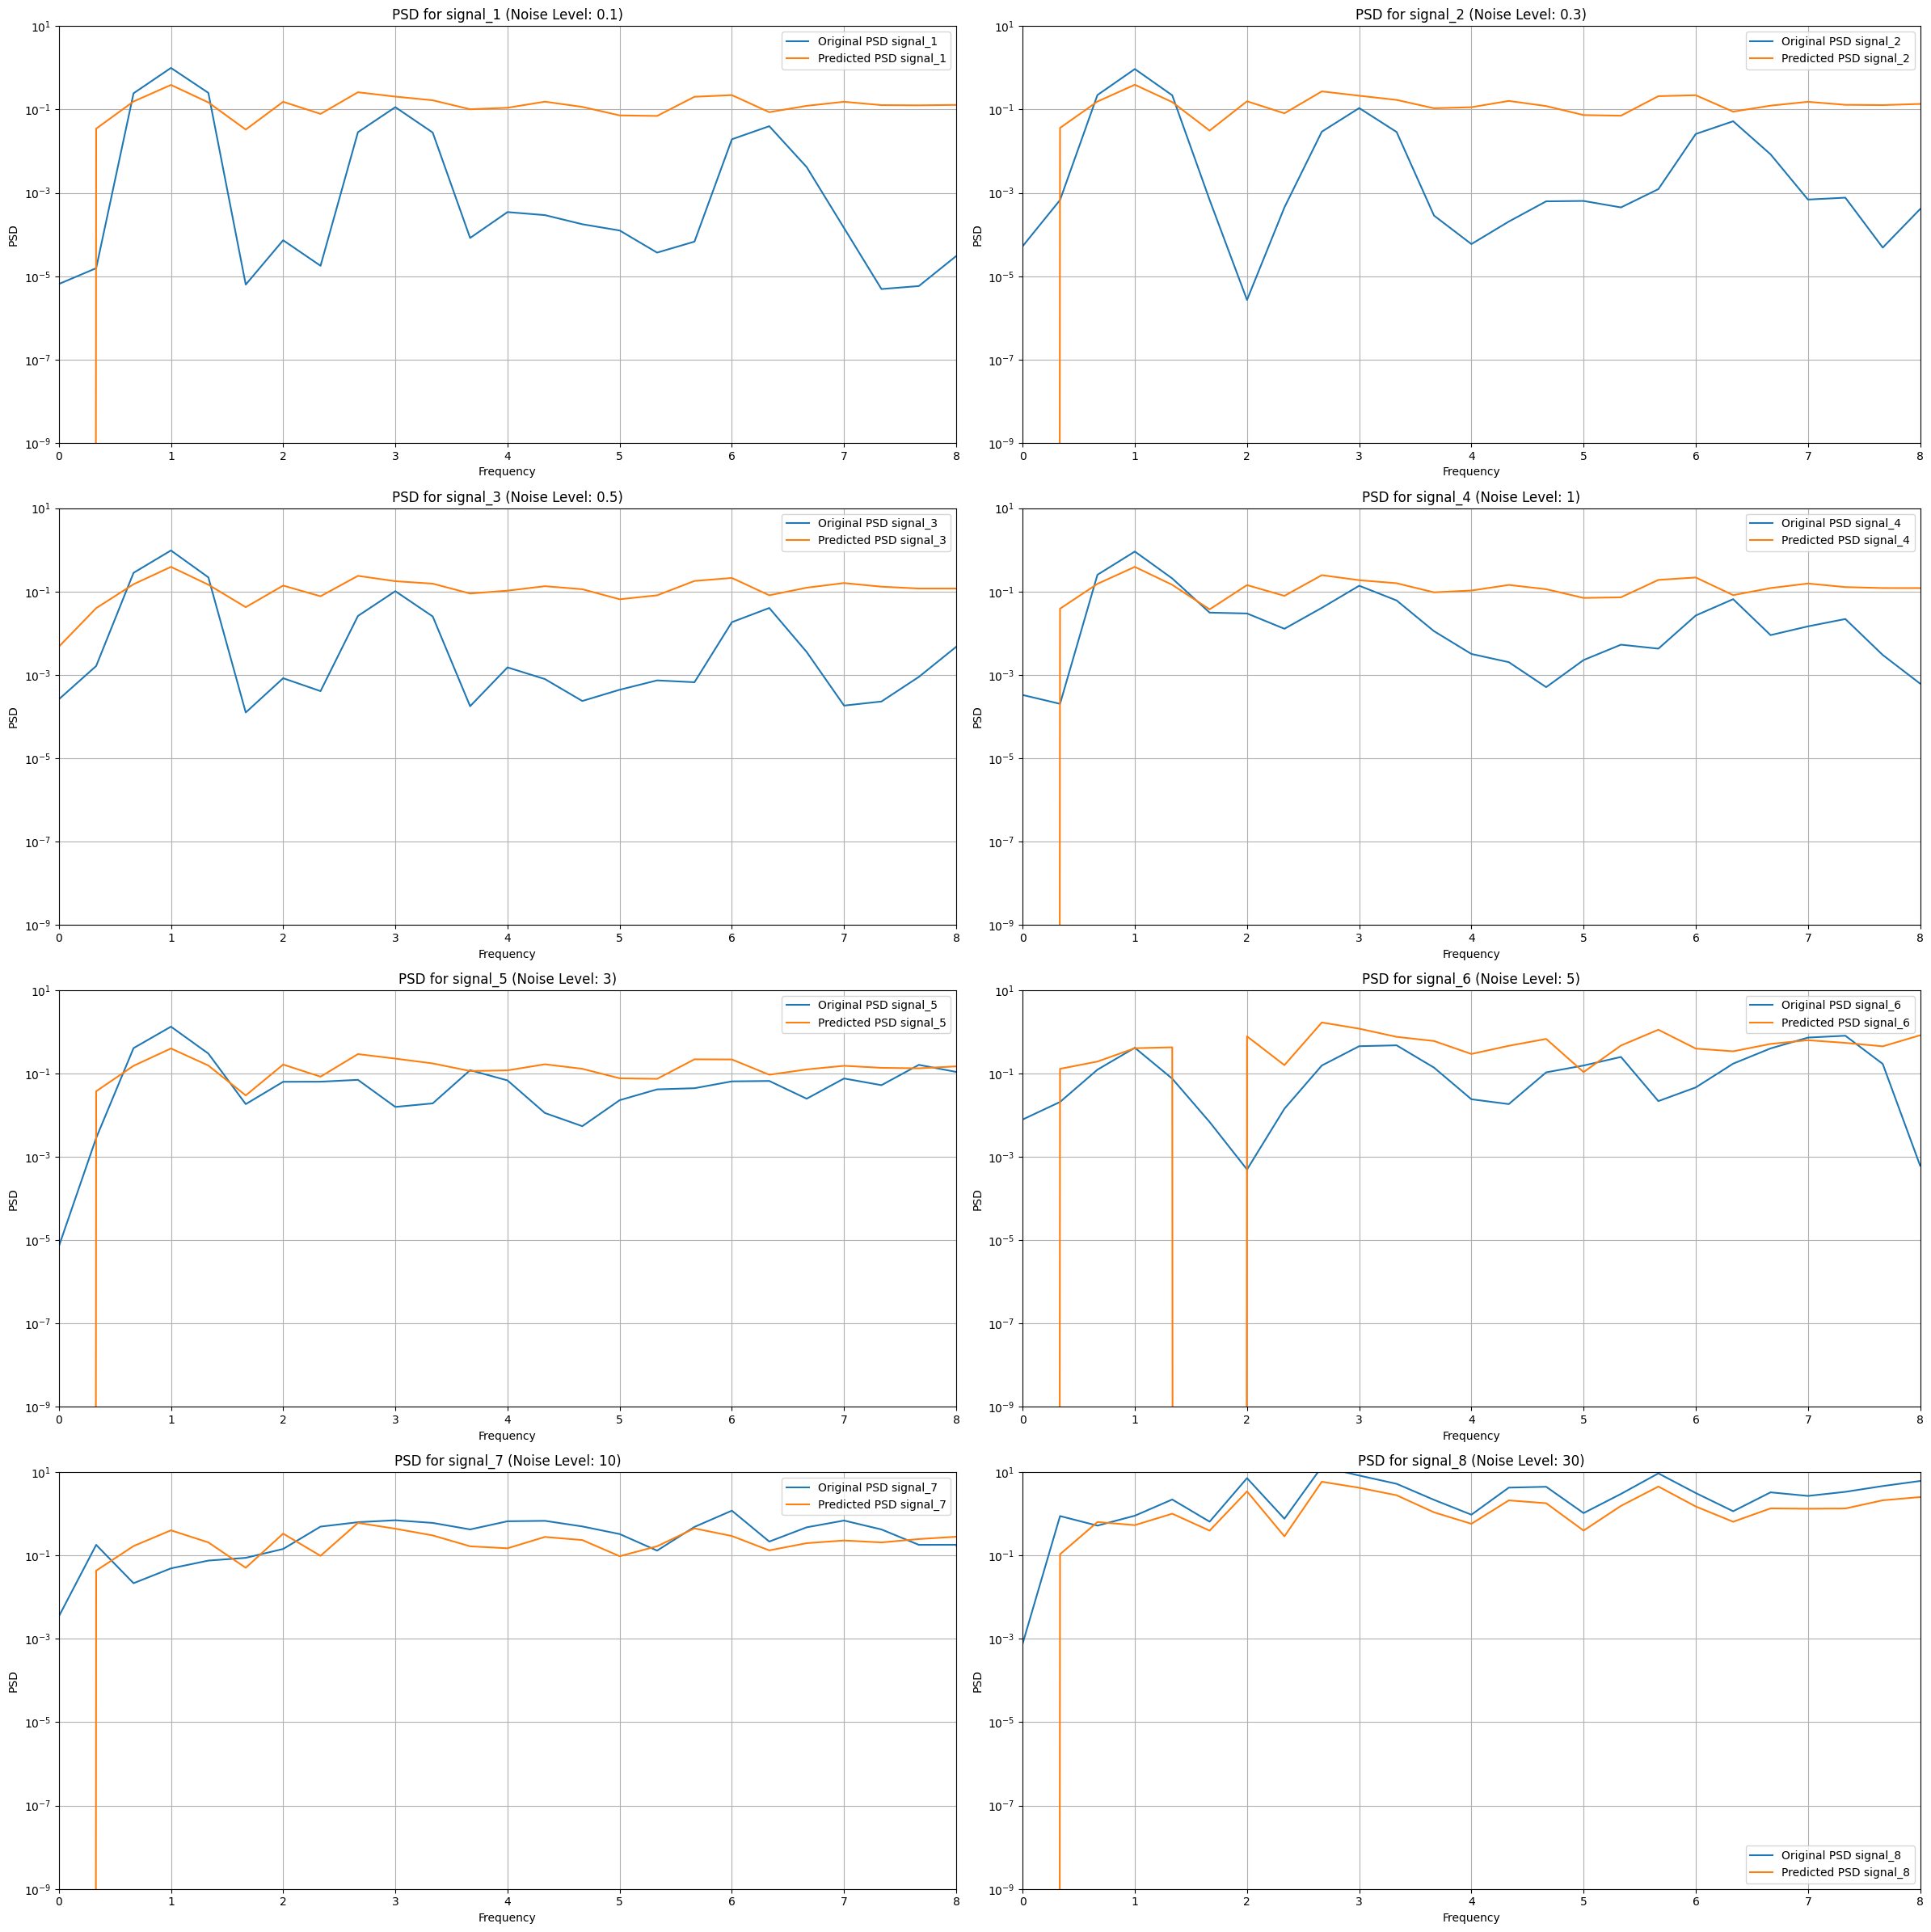

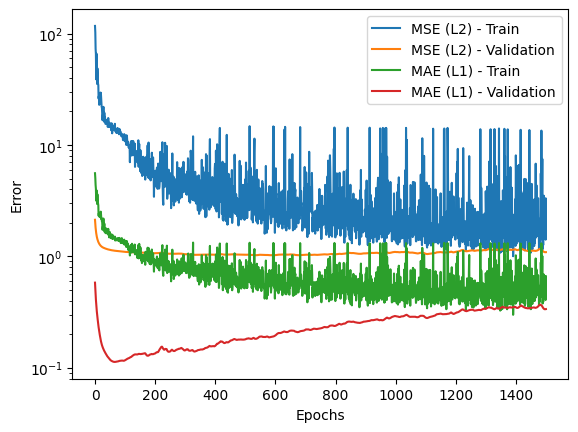

In [45]:
# Predecir las PSDs
predicted_psds = model.predict(signals)

# Obtener predicciones y calcular métricas para el conjunto de prueba
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MAE (L1): {mae}")
print(f"MSE (L2): {mse}")
print(f"RMSE: {rmse}")

# Definir los niveles de ruido
noise_levels = [0.1, 0.3, 0.5, 1, 3, 5, 10, 30]

# Crear figura y subplots
fig, axs = plt.subplots(len(signals)//2, 2, figsize=(12*2, 6*(len(signals)//2)))

# Iterar sobre cada señal y su PSD predicha
for i in range(len(signals)):
    # Calcular la posición del subplot basado en la fila y columna
    row = i // 2
    col = i % 2
    
    # Graficar la PSD original y la PSD predicha en la misma gráfica
    axs[row, col].semilogy(freq, psds[i], label=f'Original PSD signal_{i+1}')
    axs[row, col].semilogy(freq, predicted_psds[i], label=f'Predicted PSD signal_{i+1}')
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_ylabel('PSD')
    axs[row, col].set_title(f'PSD for signal_{i+1} (Noise Level: {noise_levels[i]})')  # Añadir el nivel de ruido en el título
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_xlim(0, 8)
    axs[row, col].set_ylim(10**-9, 10)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar las gráficas
plt.show()

# Graficar los errores durante el entrenamiento en escala logarítmica
plt.semilogy(history.history['loss'], label='MSE (L2) - Train')
plt.semilogy(history.history['val_loss'], label='MSE (L2) - Validation')
plt.semilogy(history.history['mean_absolute_error'], label='MAE (L1) - Train')
plt.semilogy(history.history['val_mean_absolute_error'], label='MAE (L1) - Validation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Señal 1:
  MAE (L1): 0.1649411455279813
  MSE (L2): 0.03606215702341083
  RMSE: 0.18990038710705892
Señal 2:
  MAE (L1): 0.16952408033640054
  MSE (L2): 0.038236339646961666
  RMSE: 0.1955411456623942
Señal 3:
  MAE (L1): 0.1523541948214157
  MSE (L2): 0.030567878867561994
  RMSE: 0.17483672059256314
Señal 4:
  MAE (L1): 0.15133472875912282
  MSE (L2): 0.030680179253678337
  RMSE: 0.1751575840598355
Señal 5:
  MAE (L1): 0.13372936936098231
  MSE (L2): 0.029056814639122068
  RMSE: 0.17046059556132634
Señal 6:
  MAE (L1): 0.6751827764613202
  MSE (L2): 0.90358464458179
  RMSE: 0.950570694152618
Señal 7:
  MAE (L1): 0.4320400212428621
  MSE (L2): 0.4102679475876631
  RMSE: 0.6405216214833525
Señal 8:
  MAE (L1): 3.1924339986257797
  MSE (L2): 20.00220231400143
  RMSE: 4.47238217441236


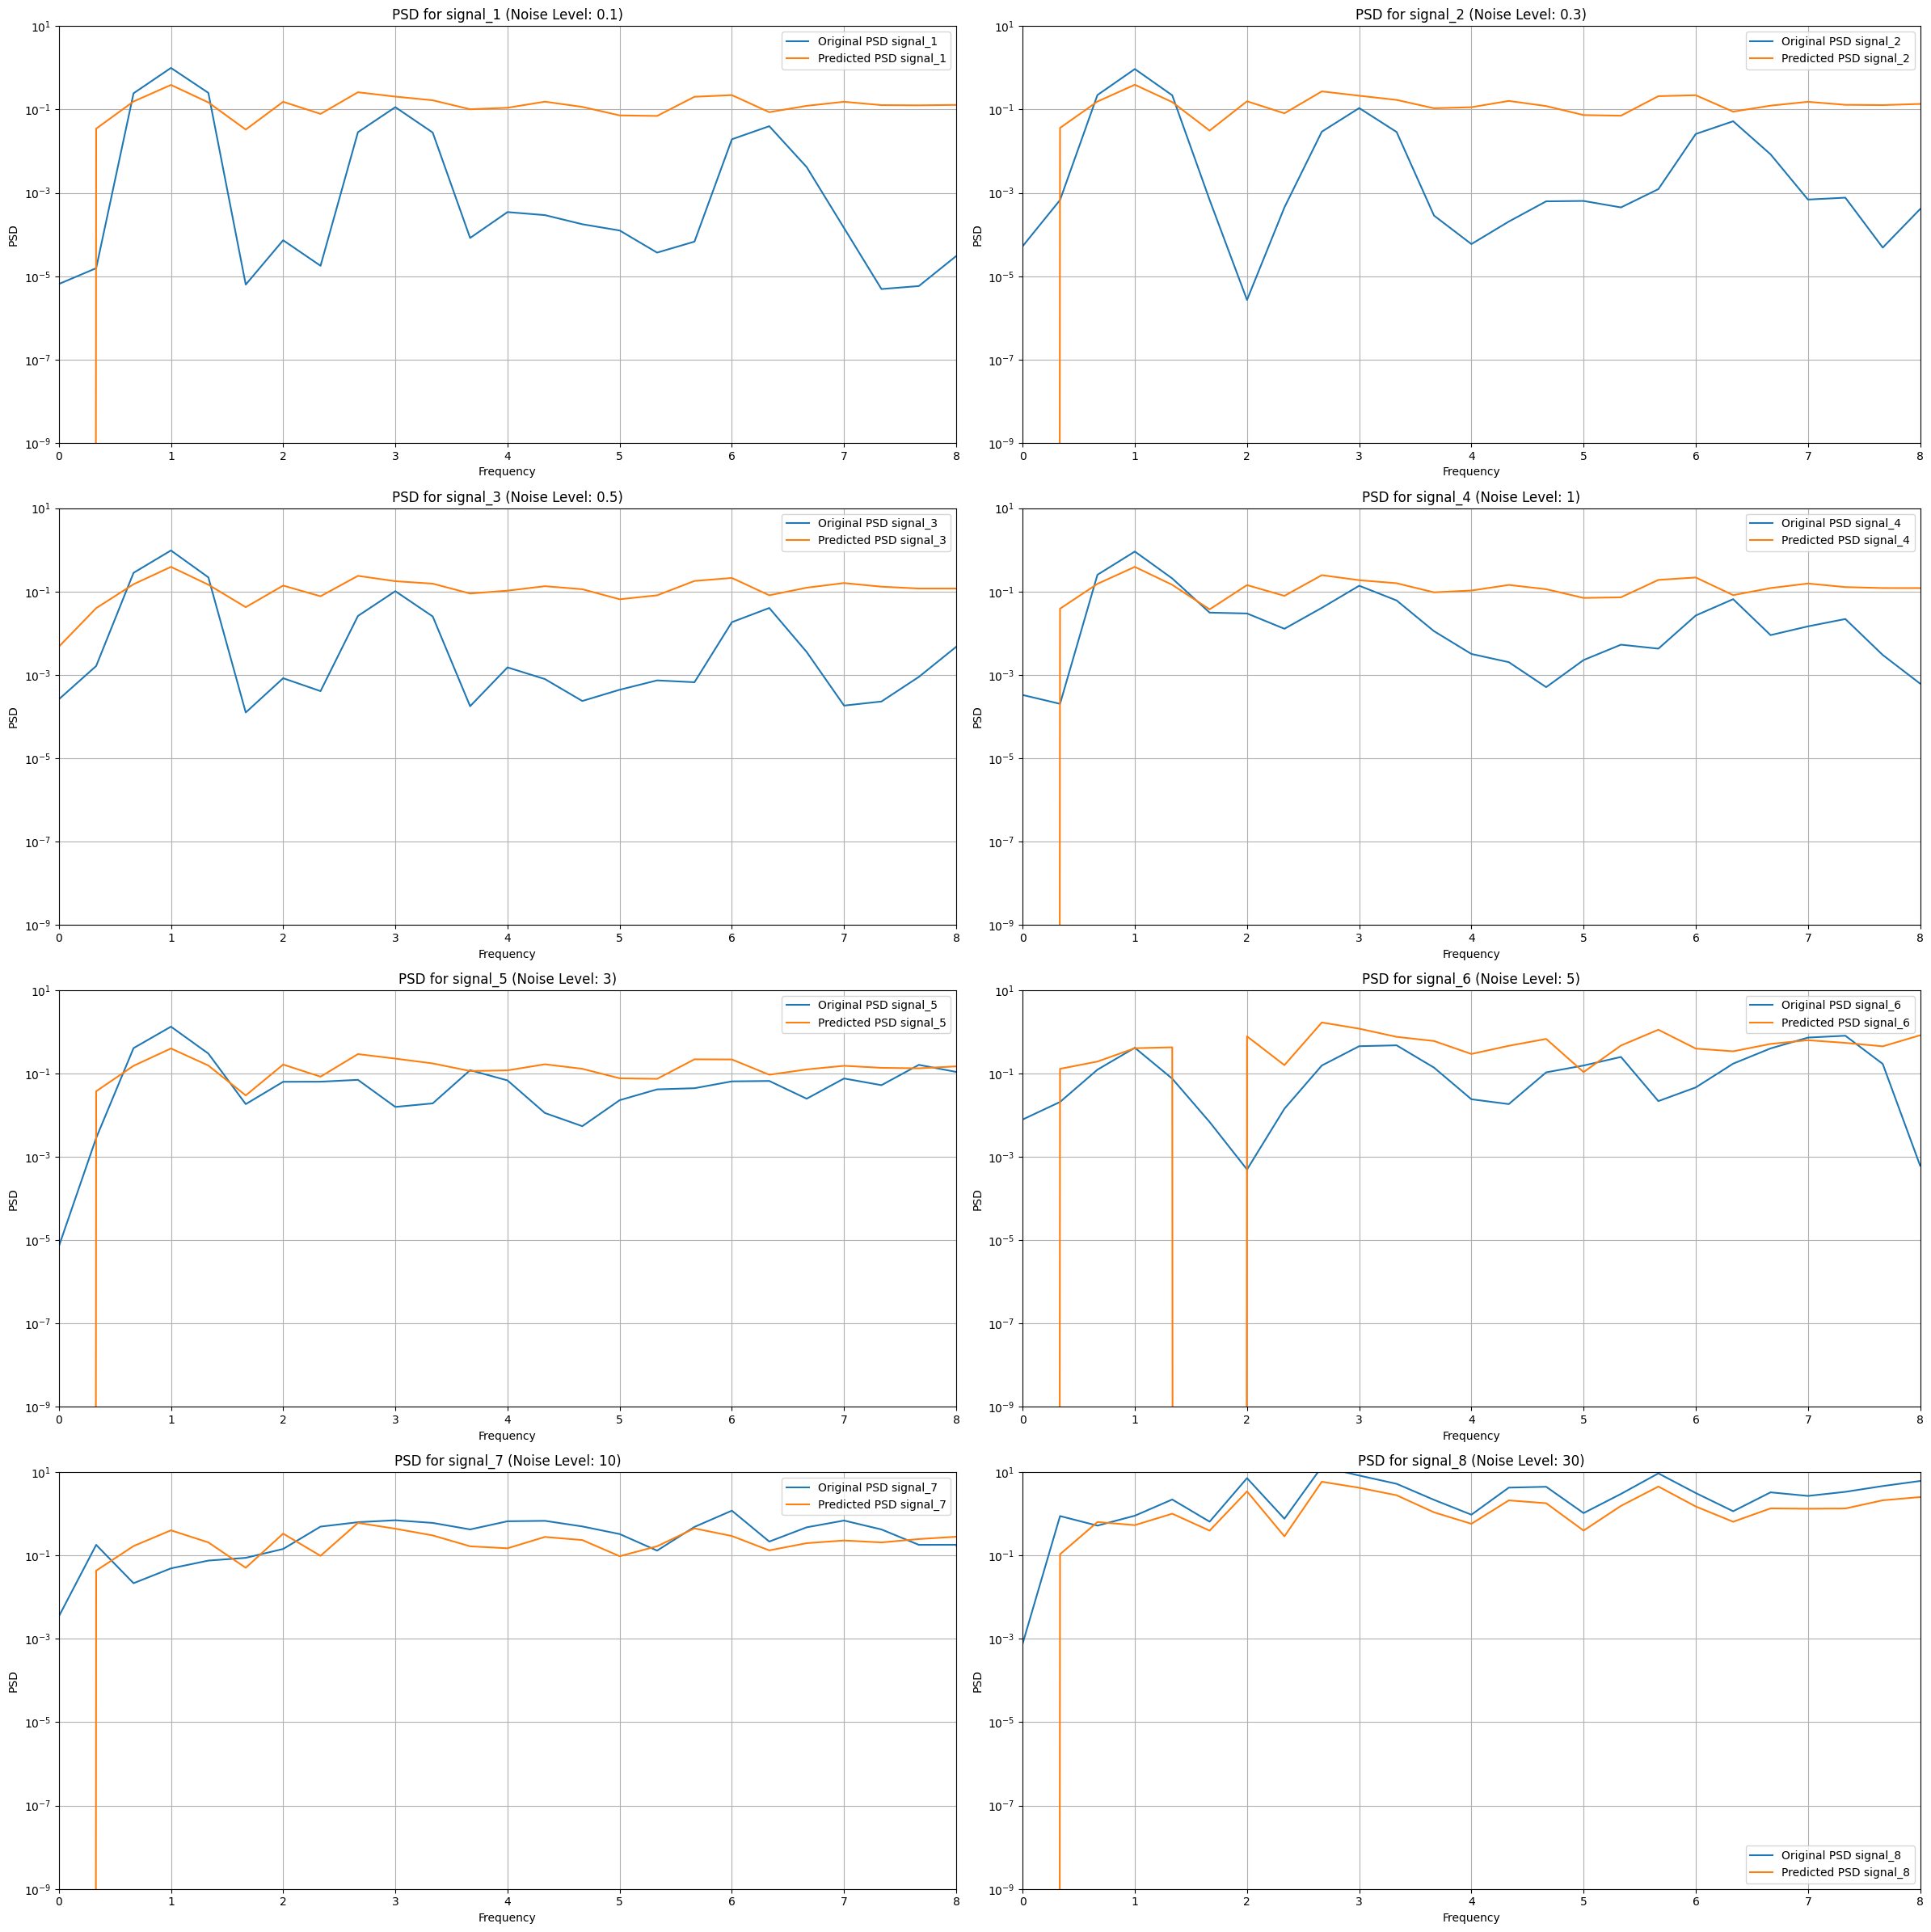

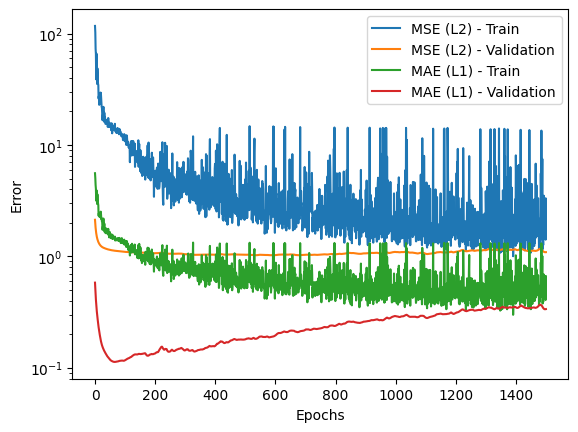

In [46]:
# Predecir las PSDs
predicted_psds = model.predict(signals)

# Definir los niveles de ruido
noise_levels = [0.1, 0.3, 0.5, 1, 3, 5, 10, 30]

# Crear figura y subplots
fig, axs = plt.subplots(len(signals)//2, 2, figsize=(12*2, 6*(len(signals)//2)))

# Inicializar listas para almacenar las métricas
mae_list = []
mse_list = []
rmse_list = []

# Iterar sobre cada señal y su PSD predicha
for i in range(len(signals)):
    # Calcular métricas para cada señal
    mae = np.mean(np.abs(psds[i] - predicted_psds[i]))
    mse = np.mean((psds[i] - predicted_psds[i]) ** 2)
    rmse = np.sqrt(mse)
    
    # Almacenar las métricas
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    
    # Imprimir las métricas para la señal actual
    print(f"Señal {i+1}:")
    print(f"  MAE (L1): {mae}")
    print(f"  MSE (L2): {mse}")
    print(f"  RMSE: {rmse}")
    
    # Calcular la posición del subplot basado en la fila y columna
    row = i // 2
    col = i % 2
    
    # Graficar la PSD original y la PSD predicha en la misma gráfica
    axs[row, col].semilogy(freq, psds[i], label=f'Original PSD signal_{i+1}')
    axs[row, col].semilogy(freq, predicted_psds[i], label=f'Predicted PSD signal_{i+1}')
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_ylabel('PSD')
    axs[row, col].set_title(f'PSD for signal_{i+1} (Noise Level: {noise_levels[i]})')  # Añadir el nivel de ruido en el título
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_xlim(0, 8)
    axs[row, col].set_ylim(10**-9, 10)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar las gráficas
plt.show()

# Graficar los errores durante el entrenamiento en escala logarítmica
plt.semilogy(history.history['loss'], label='MSE (L2) - Train')
plt.semilogy(history.history['val_loss'], label='MSE (L2) - Validation')
plt.semilogy(history.history['mean_absolute_error'], label='MAE (L1) - Train')
plt.semilogy(history.history['val_mean_absolute_error'], label='MAE (L1) - Validation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


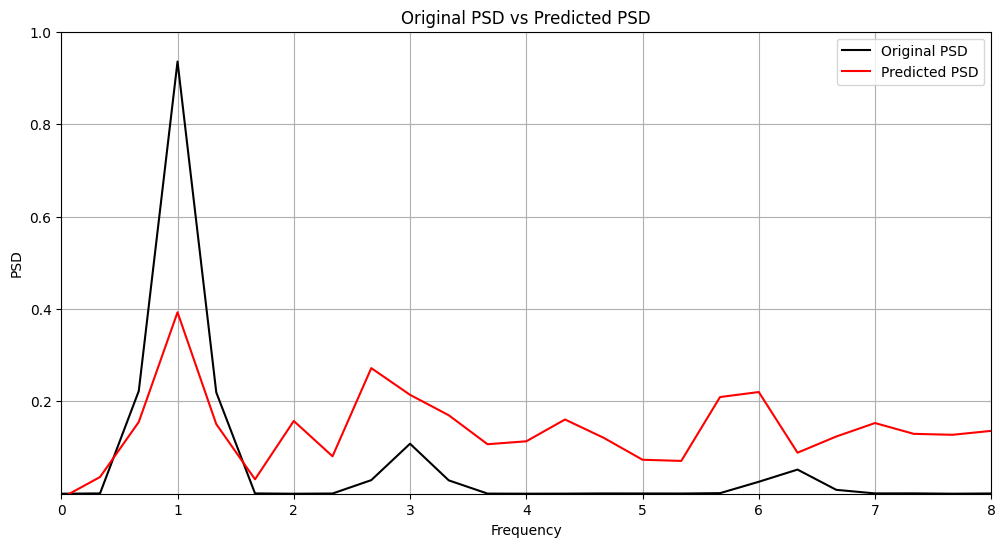

In [49]:
predicted_psds = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='Original PSD',color='black')
plt.plot(freq, y_pred[0], label='Predicted PSD', color='red')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Original PSD vs Predicted PSD')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)
plt.show()

Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 114.5767 - mean_absolute_error: 5.2864 - mean_squared_error: 113.3821 - val_loss: 1.9255 - val_mean_absolute_error: 0.5019 - val_mean_squared_error: 0.7390
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 108.2109 - mean_absolute_error: 5.0273 - mean_squared_error: 107.0244 - val_loss: 1.7913 - val_mean_absolute_error: 0.4498 - val_mean_squared_error: 0.6101
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 82.7572 - mean_absolute_error: 4.3613 - mean_squared_error: 81.5759 - val_loss: 1.6917 - val_mean_absolute_error: 0.4103 - val_mean_squared_error: 0.5147
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 57.0742 - mean_absolute_error: 3.7069 - mean_squared_error: 55.8971 - val_loss: 1.6218 - val_mean_absolute_error: 0.3799 - val_mean_squared_error: 0.4484
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 75.4168 - mean_absolute_error: 4.1630 - mean_squared_error: 74.2433 - val_loss: 1.5

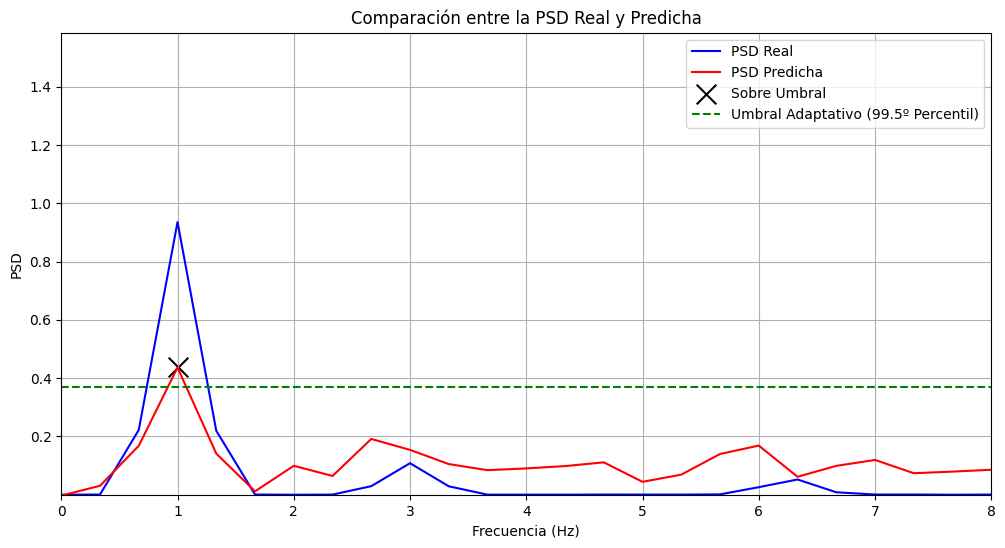

In [50]:

# Construcción y entrenamiento del modelo
model = build_model(X_train.shape[1], y_train[0])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, batch_size=64)

# Realizar predicciones
predicted_psd = model.predict(X_test)

# Encontrar picos en la PSD predicha
peaks, properties = find_peaks(predicted_psd[0])

# Umbral adaptativo basado en percentil
percentil = 99.5
umbral_adaptativo = np.percentile(predicted_psd[0], percentil)
umbral_index = np.argmin(np.abs(predicted_psd[0] - umbral_adaptativo))
frecuencia_umbral = freq[umbral_index]

# Filtrar frecuencias sobre el umbral
indices_sobre_umbral = np.where(predicted_psd[0] > umbral_adaptativo)[0]
frecuencias_sobre_umbral = freq[indices_sobre_umbral]
psd_sobre_umbral = predicted_psd[0][indices_sobre_umbral]

# Graficar la PSD real y predicha, junto con los picos y el umbral adaptativo
plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='blue')
plt.plot(freq, predicted_psd[0], label='PSD Predicha', color='red')

# Verificar si hay picos y mostrar los armónicos
if peaks.size > 0:
    frecuencias_armonicos = freq[peaks]
    if len(frecuencias_armonicos) >= 5:
        frecuencia_armonico_1 = frecuencias_armonicos[0]  
        frecuencia_armonico_3 = frecuencias_armonicos[2]  
        frecuencia_armonico_5 = frecuencias_armonicos[4]  
        print(f'Frecuencia del primer armónico: {frecuencia_armonico_1:.2f} Hz')
        print(f'Frecuencia del tercer armónico: {frecuencia_armonico_3:.2f} Hz')
        print(frecuencia_armonico_5)
        print(f'Frecuencia del quinto armónico: {frecuencia_armonico_5:.2f} Hz')
    else:
        print('No se detectaron suficientes armónicos para acceder a los armónicos 1, 3 y 5.')

# Marcar los puntos sobre el umbral en la gráfica
plt.scatter(frecuencias_sobre_umbral, psd_sobre_umbral, color='black', marker='x', s=200, label='Sobre Umbral')

# Añadir líneas de umbral y configuraciones adicionales a la gráfica
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.axhline(umbral_adaptativo, color='green', linestyle='--', label=f'Umbral Adaptativo ({percentil}º Percentil)')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0.2)
plt.show()

In [51]:
wk1=(frecuencia_armonico_1/frecuencia_armonico_1)
wk3=np.sqrt((frecuencia_armonico_3/frecuencia_armonico_1))
wk5=np.sqrt((frecuencia_armonico_5/frecuencia_armonico_1))

print(wk1)
print(wk3)
print(wk5)


1.0
1.632993161855452
2.449489742783178


In [52]:
def generate_signal():
    freq1 = wk1
    freq2 = wk3
    freq3 = wk5

    omega_0 = 2*np.pi

    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5

    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    return signal




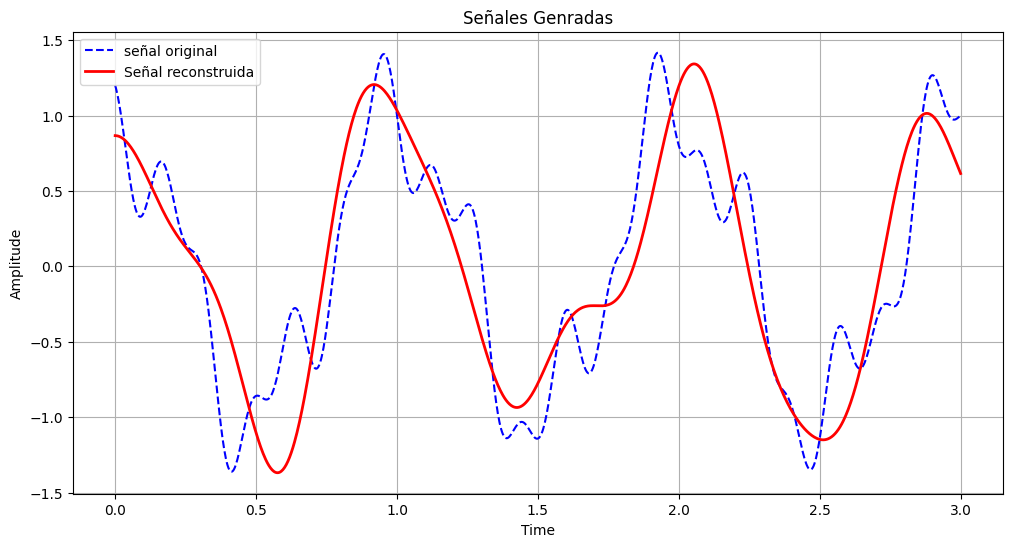

In [53]:
signaljk = generate_signal()
plt.figure(figsize=(12,6))
plt.plot(vector_time, signal, label='señal original', color='blue', linestyle='--')

plt.plot(vector_time, signaljk, label='Señal reconstruida', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

In [61]:

# Construcción y entrenamiento del modelo
model = build_model(X_train.shape[1], y_train[0])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

# Graficar la pérdida del modelo
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

# Realizar predicciones
predicted_psd = model.predict(X_test)

frequencias_interes = [1, 3, 5]

# Encontrar los valores de PSD en las frecuencias deseadas para la primera muestra en X_test
for i, freq_val in enumerate(frequencias_interes):
    # Encontrar el índice de la frecuencia más cercana
    idx = np.argmin(np.abs(freq - freq_val))
    print(f'Valor en {freq_val} Hz: {predicted_psd[0][idx]:.4e}')

# Graficar la PSD real vs. la predicha
plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='yellow')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)  # Ajuste del rango y-lim para visualizar mejor los valores
plt.show()

TypeError: build_model() takes 1 positional argument but 2 were given

In [55]:
#Valor en 1 Hz: 9.5725e-01
#Valor en 3 Hz: 1.0141e-01
#Valor en 5 Hz: 4.7195e-02
def generate_signal():
    freq1 = 1
    freq2 = 3
    freq3 = 5

    omega_0 = 2*np.pi

    signal =((np.sqrt(9.5725e-01/9.5725e-01))*np.cos(omega_0*freq1*vector_time) - (np.sqrt(1.0141e-01/9.5725e-01))*np.cos(omega_0*freq2*vector_time) + (np.sqrt(4.7195e-02/9.5725e-01))*np.cos(omega_0*freq3*vector_time))
    return signal


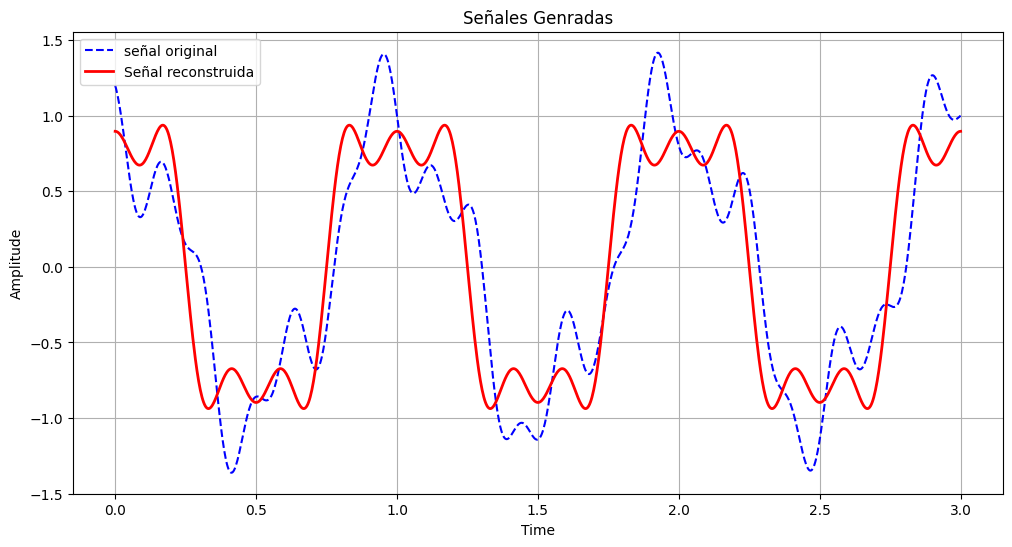

In [56]:
signaljkl = generate_signal()
plt.figure(figsize=(12,6))
plt.plot(vector_time, signal, label='señal original', color='blue', linestyle='--')
plt.plot(vector_time, signaljkl, label='Señal reconstruida', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.7023 - mean_absolute_error: 0.3534 - mean_squared_error: 0.1963 - val_loss: 0.4757 - val_mean_absolute_error: 0.0306 - val_mean_squared_error: 9.5149e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4808 - mean_absolute_error: 0.1099 - mean_squared_error: 0.0187 - val_loss: 0.4288 - val_mean_absolute_error: 0.0754 - val_mean_squared_error: 0.0057
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4230 - mean_absolute_error: 0.0879 - mean_squared_error: 0.0125 - val_loss: 0.3754 - val_mean_absolute_error: 0.0340 - val_mean_squared_error: 0.0012
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3701 - mean_absolute_error: 0.0643 - mean_squared_error: 0.0070 - val_loss: 0.3317 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 3.1994e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3301 - mean_absolute_error: 0.0587 - mean_squared_error: 0.0083 - val_loss: 0.2953 - v

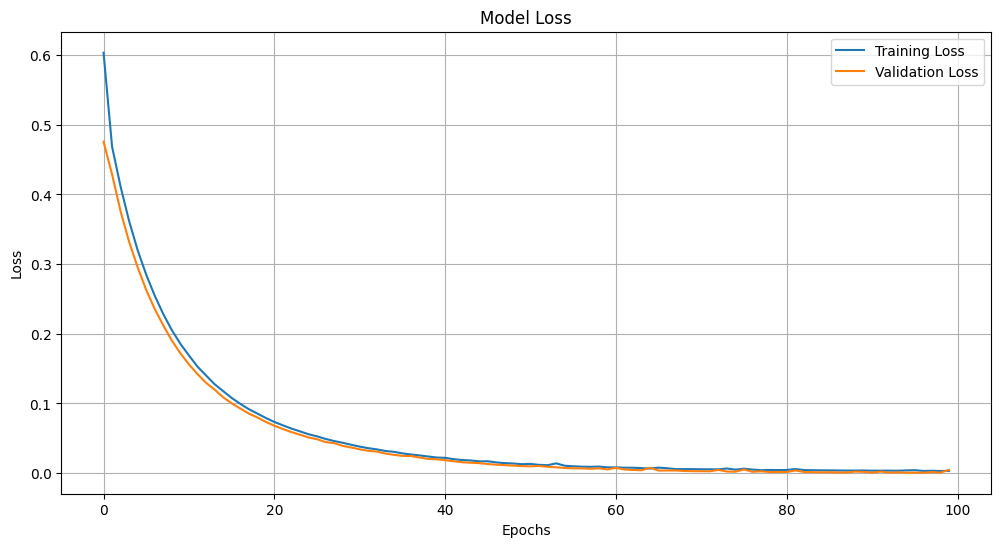

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scipy.interpolate import interp1d

# Calcular la mediana de cada señal
signalK = np.array([signal_1, signal_2, signal_3, signal_4])
mediansignalk = np.median(signalK, axis=0)

# Calcular la mediana de cada PSD
pxxk = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])
medianpxxsignal = np.median(pxxk, axis=0)

# Asegurarse de que ambos tengan el mismo tamaño mediante interpolación
if len(mediansignalk) > len(medianpxxsignal):
    interpolator = interp1d(np.linspace(0, 1, len(medianpxxsignal)), medianpxxsignal, kind='linear')
    medianpxxsignal = interpolator(np.linspace(0, 1, len(mediansignalk)))
elif len(medianpxxsignal) > len(mediansignalk):
    interpolator = interp1d(np.linspace(0, 1, len(mediansignalk)), mediansignalk, kind='linear')
    mediansignalk = interpolator(np.linspace(0, 1, len(medianpxxsignal)))

# Convertir a arrays bidimensionales para que sean compatibles con el modelo
mediansignalk = mediansignalk.reshape(-1, 1)
medianpxxsignal = medianpxxsignal.reshape(-1, 1)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mediansignalk, medianpxxsignal, test_size=0.25, random_state=42)

def build_model(input_shape):
    """
    Construye un modelo de red neuronal para el procesamiento de señales.
    Parameters:
    - input_shape (tuple): Forma de la señal de entrada.
    Returns:
    - model (secuencial): Modelo de red neuronal compilado.
    """
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='linear'))  # Salida con una sola característica

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error', 
                  metrics=[MeanAbsoluteError(), MeanSquaredError()])
    
    return model

# Construcción del modelo
model = build_model((1,))

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predecir la PSD de la mediana usando el conjunto de prueba
predicted_psd = model.predict(X_test)

# Obtener las métricas de rendimiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar las métricas de rendimiento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.6228 - mean_absolute_error: 0.2835 - mean_squared_error: 0.1204 - val_loss: 0.4759 - val_mean_absolute_error: 0.1259 - val_mean_squared_error: 0.0159
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4610 - mean_absolute_error: 0.1039 - mean_squared_error: 0.0171 - val_loss: 0.3979 - val_mean_absolute_error: 0.0418 - val_mean_squared_error: 0.0018
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3893 - mean_absolute_error: 0.0643 - mean_squared_error: 0.0080 - val_loss: 0.3396 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 5.0097e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3333 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0066 - val_loss: 0.2921 - val_mean_absolute_error: 0.0284 - val_mean_squared_error: 8.2830e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2857 - mean_absolute_error: 0.0486 - mean_squared_error: 0.0048 - val_loss: 0.2518 - v

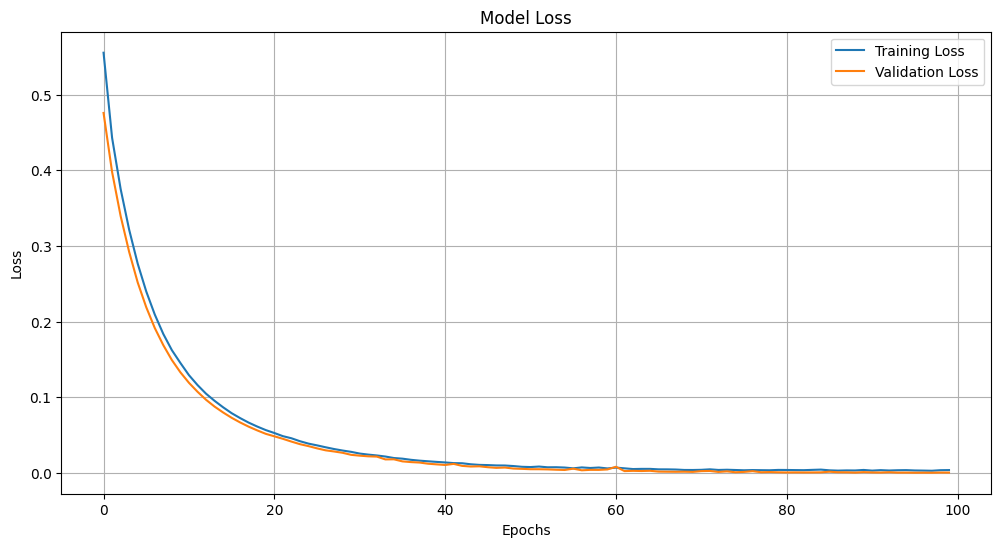

In [58]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scipy.interpolate import interp1d

# Calcular la mediana de cada señal
signalK = np.array([signal_1, signal_2, signal_3, signal_4])
mediansignalk = np.median(signalK, axis=0)

# Calcular la mediana de cada PSD
pxxk = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])
medianpxxsignal = np.median(pxxk, axis=0)

# Asegurarse de que ambos tengan el mismo tamaño mediante interpolación
if len(mediansignalk) > len(medianpxxsignal):
    interpolator = interp1d(np.linspace(0, 1, len(medianpxxsignal)), medianpxxsignal, kind='linear')
    medianpxxsignal = interpolator(np.linspace(0, 1, len(mediansignalk)))
elif len(medianpxxsignal) > len(mediansignalk):
    interpolator = interp1d(np.linspace(0, 1, len(mediansignalk)), mediansignalk, kind='linear')
    mediansignalk = interpolator(np.linspace(0, 1, len(medianpxxsignal)))

# Convertir a arrays bidimensionales para que sean compatibles con el modelo
mediansignalk = mediansignalk.reshape(-1, 1)
medianpxxsignal = medianpxxsignal.reshape(-1, 1)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mediansignalk, medianpxxsignal, test_size=0.25, random_state=42)

def build_model(input_shape):
    """
    Construye un modelo de red neuronal para el procesamiento de señales.
    Parameters:
    - input_shape (tuple): Forma de la señal de entrada.
    Returns:
    - model (secuencial): Modelo de red neuronal compilado.
    """
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='sigmoid', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='linear'))  # Salida con una sola característica

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error', 
                  metrics=[MeanAbsoluteError(), MeanSquaredError()])
    
    return model

# Construcción del modelo
model = build_model((1,))

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predecir la PSD de la mediana usando el conjunto de prueba
predicted_psd = model.predict(X_test)

# Definir una tolerancia para considerar una predicción "correcta"
tolerancia = 0.1  # Puedes ajustar este valor según tu problema

# Calcular el "accuracy" basado en la tolerancia
aciertos = np.sum(np.abs(predicted_psd - y_test) <= tolerancia)
total = len(y_test)
accuracy = aciertos / total

print(f"Accuracy: {accuracy * 100:.2f}%")

# Obtener las métricas de rendimiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar las métricas de rendimiento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
import numpy as np
import pandas as pd


def calculate_reconstruction_error(original_signal, reconstructed_signal):
    error = np.abs(original_signal - reconstructed_signal)
    mean_error = np.mean(error)
    max_error = np.max(error)
    return mean_error, max_error


mean_errors = []
max_errors = []

for i in range(N_number_signals):
    original_signal = M_points_signal
    reconstructed_signal = generate_signal()  
    mean_error, max_error = calculate_reconstruction_error(original_signal, reconstructed_signal)
    mean_errors.append(mean_error)
    max_errors.append(max_error)

mean_error_table = pd.DataFrame({'Signal': range(N_number_signals), 'Mean Error': mean_errors})
max_error_table = pd.DataFrame({'Signal': range(N_number_signals), 'Max Error': max_errors})


print("Tabla de Error de Reconstrucción (Error Promedio):")
print(mean_error_table)

print("\nTabla de Error de Reconstrucción (Error Máximo):")
print(max_error_table)

Tabla de Error de Reconstrucción (Error Promedio):
     Signal   Mean Error
0         0  1023.999124
1         1  1023.999124
2         2  1023.999124
3         3  1023.999124
4         4  1023.999124
..      ...          ...
995     995  1023.999124
996     996  1023.999124
997     997  1023.999124
998     998  1023.999124
999     999  1023.999124

[1000 rows x 2 columns]

Tabla de Error de Reconstrucción (Error Máximo):
     Signal    Max Error
0         0  1024.937201
1         1  1024.937201
2         2  1024.937201
3         3  1024.937201
4         4  1024.937201
..      ...          ...
995     995  1024.937201
996     996  1024.937201
997     997  1024.937201
998     998  1024.937201
999     999  1024.937201

[1000 rows x 2 columns]


In [66]:
def calculate_reconstruction_error(original_signal, reconstructed_signal):
    error = np.abs(original_signal - reconstructed_signal)
    mean_error = np.mean(error)
    max_error = np.max(error)
    return mean_error, max_error

# Seleccionar la señal original y la señal reconstruida
original_signal = M_points_signal
reconstructed_signal = generate_signal()

# Calcular el error de reconstrucción
mean_error, max_error = calculate_reconstruction_error(original_signal, reconstructed_signal)

# Imprimir los resultados
print(f"Error promedio: {mean_error}")
print(f"Error máximo: {max_error}")

Error promedio: 1023.9991244535693
Error máximo: 1024.9372008225207


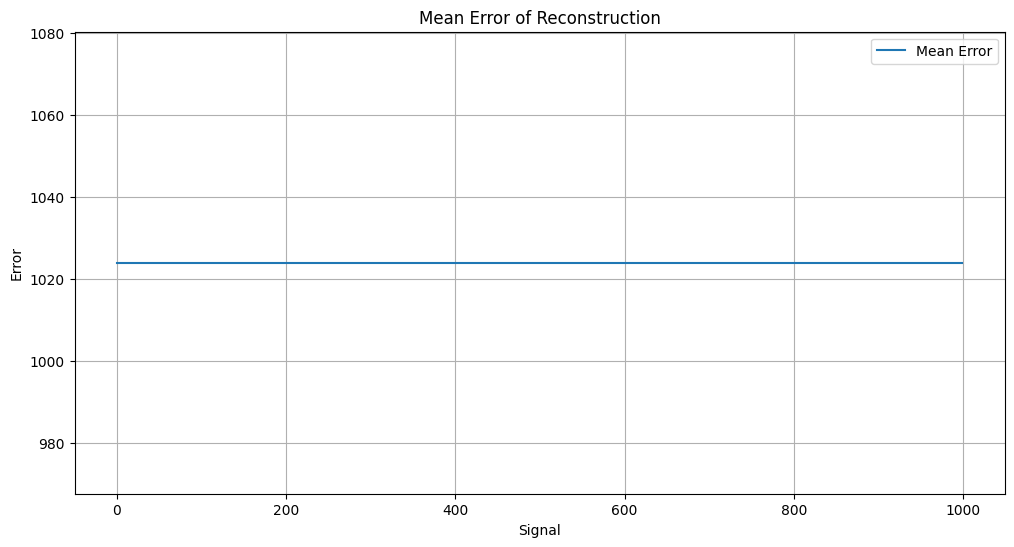

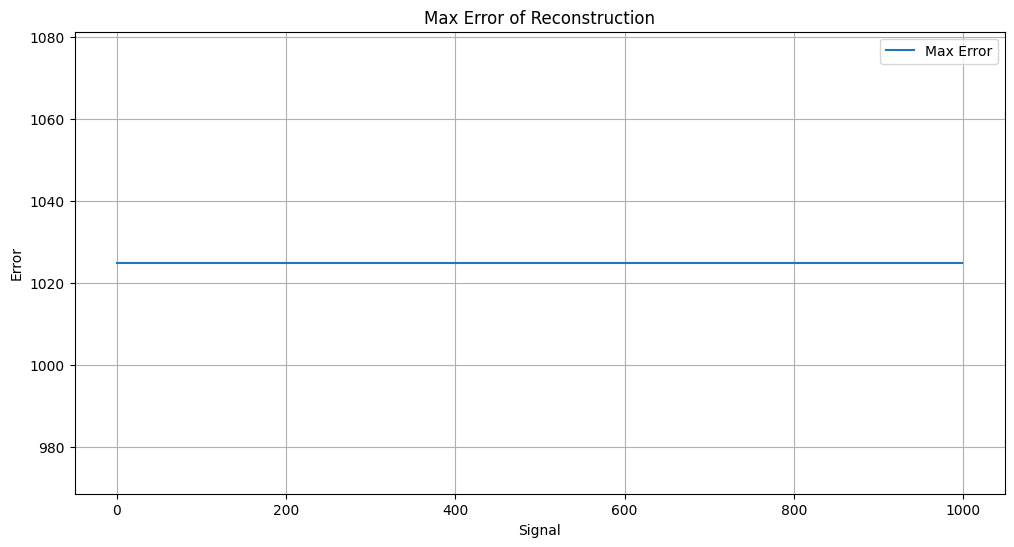

In [68]:
import matplotlib.pyplot as plt

# Plotting the mean errors
plt.figure(figsize=(12, 6))
plt.plot(mean_error_table['Signal'], mean_error_table['Mean Error'], label='Mean Error')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.title('Mean Error of Reconstruction')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the max errors
plt.figure(figsize=(12, 6))
plt.plot(max_error_table['Signal'], max_error_table['Max Error'], label='Max Error')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.title('Max Error of Reconstruction')
plt.legend()
plt.grid(True)
plt.show()